# Omar's Machine Learning Assignment 1 - Problem 4
## DSCI 3415 - Fundamentals of Machine Learning
## March 12, 2025

## Importing the Necessary Libraries

In [36]:
import os
import numpy as np
from PIL import Image
from numpy.linalg import pinv
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## Loading & Flattening the Images & Labels

In [85]:
def load_the_images(folder):
    list_of_images = []
    for filename in sorted(os.listdir(folder)):
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            my_image = Image.open(os.path.join(folder, filename)).convert('L')
            list_of_images.append(np.array(my_image).flatten())
    return np.array(list_of_images)

## Loading the Train & Test Data Sets 

In [86]:
train_folder = "/Users/omar/Desktop/Assignment 1-3/Assignment 1 Dataset/Train"
test_folder = "/Users/omar/Desktop/Assignment 1-3/Assignment 1 Dataset/Test"
train_labels_file = "/Users/omar/Desktop/Assignment 1-3/Assignment 1 Dataset/Train/Training Labels.txt"
test_labels_file = "/Users/omar/Desktop/Assignment 1-3/Assignment 1 Dataset/Test/Test Labels.txt"

train_images = load_the_images(train_folder)
test_images = load_the_images(test_folder)

def load_the_labels(filepath):
    with open(filepath) as f:
        return np.array([int(line.strip()) for line in f])

train_labels = load_the_labels(train_labels_file)
test_labels = load_the_labels(test_labels_file)

## Mean

In [87]:
# Calculating the mean
def calculate_the_mean(data):
    mean = np.zeros(data.shape[1])
    for i in range(data.shape[0]):
        mean = mean + data[i]
    return mean / data.shape[0]

## Within-Class Scatter Matrix

In [88]:
# Calculating the within-class scatter matrix, known as Sw
def within_class_scatter_matrix(data, mean):
    scatter_matrix = np.zeros((data.shape[1], data.shape[1]))
    for i in range(data.shape[0]):
        diff = (data[i] - mean).reshape(-1, 1)
        scatter_matrix = scatter_matrix + np.dot(diff, diff.T)
    return scatter_matrix

## Pseudoinverse

In [89]:
def pseudoinverse(matrix):
    u, s, vh = np.linalg.svd(matrix, full_matrices = False)
    s_inverse = np.array([1.0 / x if x > 1e-10 else 0 for x in s])
    return vh.T @ np.diag(s_inverse) @ u.T

## Class Means (m1 & m2)

In [90]:
# Calculating the class means, known as m1 and m2
def calculate_the_class_means(data, labels):
    means = {}
    for i in np.unique(labels):
        class_data = data[labels == i]
        means[i] = calculate_the_mean(class_data)
    return means

## Fisher's LD For Each Class

In [91]:
# Calculating Fisher's Linear Discriminant for each one of the classes
def fishers_linear_discriminant(S_w, mean1, mean2):
    S_w_inverse = pseudoinverse(S_w)
    w = S_w_inverse @ (mean2 - mean1)
    return w

## Bias Term (w0)

In [92]:
# Calculating the bias term, known as w0
def calculate_the_bias(w, mean1, mean2):
    return -0.5 * w.T @ (mean1 + mean2)

## Train Classifier

In [93]:
class_means = calculate_the_class_means(train_images, train_labels)
S_w = np.zeros((train_images.shape[1], train_images.shape[1]))

# Calculating the within-class scatter matrix, Sw, for all of the classes combined
for label, mean in class_means.items():
    class_data = train_images[train_labels == label]
    S_w = S_w + within_class_scatter_matrix(class_data, mean)

fishers_ld_vectors = {}
bias_terms = {}

for i in class_means:
    fishers_ld_vectors[i] = fishers_linear_discriminant(S_W, class_means[i], calculate_the_mean(train_images))
    bias_terms[i] = calculate_the_bias(fishers_ld_vectors[i], class_means[i], calculate_the_mean(train_images))

## Classification Function

In [94]:
def classification(image, fishers_ld_vectors, use_bias = False, bias_terms = None):
    list_of_scores = []
    for i, w in fishers_ld_vectors.items():
        my_score = image @ w
        if use_bias:
            my_score = my_score + bias_terms[i]
        list_of_scores.append(my_score)
    return np.argmax(list_of_scores)

## Outputting & Saving the Images

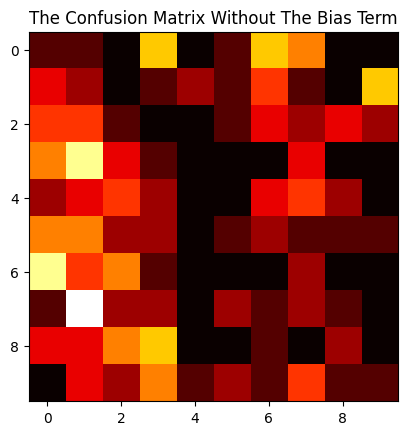

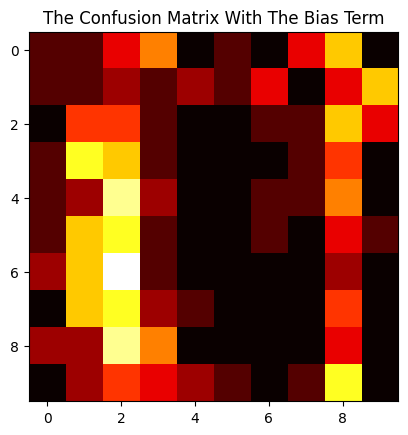

In [95]:
# Without the Bias:
predictions_without_bias_term = [classification(my_image, fishers_ld_vectors, use_bias = False) for my_image in test_images]
confusion_without_bias_term = confusion_matrix(test_labels, predictions_without_bias_term)
plt.imshow(confusion_no_bias, cmap = 'hot', interpolation = 'nearest')
plt.title("The Confusion Matrix Without The Bias Term")
plt.savefig("Confusion_NoBias.jpg")
plt.show()

# With the Bias:
predictions_with_bias_term = [classification(my_image, fishers_ld_vectors, use_bias = True, bias_terms = bias_terms) for my_image in test_images]
confusion_with_bias_term = confusion_matrix(test_labels, predictions_with_bias_term)
plt.imshow(confusion_with_bias, cmap = 'hot', interpolation = 'nearest')
plt.title("The Confusion Matrix With The Bias Term")
plt.savefig("Confusion_WithBias.jpg")
plt.show()

## Computing The Accuracy Percentages

In [102]:
# Computing the two accuracy percentages, one with the bias and another one without the bias
accuracy_without_the_bias_term = np.sum(predictions_no_bias == test_labels) / len(test_labels) * 100
accuracy_with_the_bias_term = np.sum(predictions_with_bias == test_labels) / len(test_labels) * 100

print('The Accuracy Percentage Without Bias: ', accuracy_without_the_bias_term, '% \n')
print('The Accuracy Percentage With Bias: ', accuracy_with_the_bias_term, '% \n')

The Accuracy Percentage Without Bias:  5.5 % 

The Accuracy Percentage With Bias:  5.0 % 

